# I. Pytorch & Torchtext

In [6]:
pip install -q torchtext==0.16.0

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [4]:
pip install torch


     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
      --------------------------------------- 0.1/5.7 MB 1.5 MB/s eta 0:00:04
     - -------------------------------------- 0.3/5.7 MB 2.6 MB/s eta 0:00:03
     --- ------------------------------------ 0.6/5.7 MB 4.0 MB/s eta 0:00:02
     ------- -------------------------------- 1.1/5.7 MB 5.7 MB/s eta 0:00:01
     ----------- ---------------------------- 1.6/5.7 MB 7.2 MB/s eta 0:00:01
     -------------- ------------------------- 2.1/5.7 MB 8.0 MB/s eta 0:00:01
     ------------------ --------------------- 2.7/5.7 MB 8.4 MB/s eta 0:00:01
     ---------------------- ----------------- 3.2/5.7 MB 8.8 MB/s eta 0:00:01
     -------------------------- ------------- 3.7/5.7 MB 9.2 MB/s eta 0:00:01
     ----------------------------- ---------- 4.3/5.7 MB 9.4 MB/s eta 0:00:01
     --------------------------------- ------ 4.8/5.7 MB 9.6 MB/s eta 0:00:01
     ------------------------------------- -- 5.3/5.7 MB 9.7 MB/s eta 

In [63]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/158.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/158.1 kB ? eta -:--:--
     -------------------- ------------------ 81.9/158.1 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 158.1/158.1 kB 1.6 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached Pillow-10.1.0-cp311-cp311-win_amd64.whl.metadata (9.6 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.6 MB 5.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.6 MB 6.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/7.6 MB 7.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/7.6 MB 7.5 MB/s eta 0:00:01
   ---------- ---------------------------

In [37]:
pip install pandas

  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:17
    --------------------------------------- 0.1/10.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.6 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/10.6 MB 4.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.6 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/10.6 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.6 MB 6.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/10.6 MB 6.9 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/10.6 MB 7.5 MB/s eta 0:00:02
   ------------- -------------------------- 3.5/10.6 MB 7.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.6 MB 7.8 MB/s eta 0:00:01
   ---------------- --

In [195]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 809.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.3/9.2 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/9.2 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.2 MB 6.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/9.2 MB 7.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.4/9.2 MB 8.4 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.2 MB 8.8 MB/s eta 0:00:01
   -------------- ------------------------- 3.4/9.2 MB 8.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.2 MB 9.2 MB/s eta 0:00:01
   ------------

## 1. Index-based Representation

In [120]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

data = ["dog bites man", "man bites dog", "dog eats meat", "man eats food"]

# Define the max vocabulary size
vocab_size = 8

# Define tokenizer function
tokenizer = get_tokenizer('basic_english')

# Create a function to yield list of tokens
def yield_tokens(examples):
    for text in examples:
        yield tokenizer(text)

# Create vocabulary
vocab = build_vocab_from_iterator(
    yield_tokens(data),
    max_tokens=vocab_size,
    specials=["<unk>"]
)
vocab.set_default_index(vocab["<unk>"])

vocab.get_stoi()

{'food': 5, 'dog': 1, '<unk>': 0, 'man': 2, 'bites': 3, 'meat': 6, 'eats': 4}

In [121]:
vocab(tokenizer("dog bites man"))

[1, 3, 2]

In [122]:
vocab(tokenizer("dog and man"))

[1, 0, 2]

## 2. Padding 

In [123]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

data = ["dog bites man", "man bites dog", "dog eats meat", "man eats food"]

# Define the max vocabulary size
vocab_size = 8

# Define tokenizer function
tokenizer = get_tokenizer('basic_english')

# Create a function to yield list of tokens
def yield_tokens(examples):
    for text in examples:
        yield tokenizer(text)

# Create vocabulary
vocab = build_vocab_from_iterator(
    yield_tokens(data),
    max_tokens=vocab_size,
    specials=["<pad>", "<unk>"]
)
vocab.set_default_index(vocab["<unk>"])

vocab.get_stoi()['<pad>']

0

In [124]:
from torchtext.transforms import PadTransform

# define padding
max_len = 4
pad_id = vocab.get_stoi()['<pad>']
padder = PadTransform(max_len, pad_id)

input = torch.tensor([2, 4, 3])
padded_input = padder(input)
padded_input

tensor([2, 4, 3, 0])

## 3. Truncating

In [125]:
from torchtext.transforms import Truncate

# define padding
max_len = 3
truncater = Truncate(max_len)

input = [2, 2, 4, 3]
truncated_input = truncater(input)
truncated_input

[2, 2, 4]

## 4. Embedding Layer

In [126]:
import torch.nn as nn

vocab_size = 7
embedding_dim = 3
embedding = nn.Embedding(vocab_size, embedding_dim)
embedding.weight

Parameter containing:
tensor([[ 0.7012,  0.5156, -1.3145],
        [ 2.0140,  0.4412, -0.6076],
        [-0.7871,  0.4287, -1.1563],
        [-0.1437, -2.0789, -2.1529],
        [-0.7808, -0.4360, -1.4220],
        [ 1.2500, -0.2108,  0.8394],
        [-0.7213,  1.2346,  1.1259]], requires_grad=True)

In [127]:
import torch

input = torch.LongTensor([[1, 2, 4], [4, 3, 2]])
embedding(input)

tensor([[[ 2.0140,  0.4412, -0.6076],
         [-0.7871,  0.4287, -1.1563],
         [-0.7808, -0.4360, -1.4220]],

        [[-0.7808, -0.4360, -1.4220],
         [-0.1437, -2.0789, -2.1529],
         [-0.7871,  0.4287, -1.1563]]], grad_fn=<EmbeddingBackward0>)

## 5. EmbeddingBag

In [128]:
import torch.nn as nn

vocab_size = 7
embedding_dim = 4
embedding_sum = nn.EmbeddingBag(vocab_size, embedding_dim, mode='sum')
embedding_sum.weight

Parameter containing:
tensor([[ 1.1768,  0.4174,  0.5940, -0.6569],
        [ 0.3359, -0.1065, -0.5740, -0.0599],
        [ 1.0655, -0.2712, -2.0895, -1.0111],
        [-0.1228, -1.0042, -0.3422, -0.3102],
        [-2.1499, -0.4793, -0.2896,  1.0670],
        [-0.5226, -0.6914, -0.2474, -0.1065],
        [ 0.8620,  0.7267, -1.8333,  0.1925]], requires_grad=True)

In [129]:
inputs = torch.tensor([1, 2, 4, 5, 4, 3], dtype=torch.long)
offsets = torch.tensor([0, 3], dtype=torch.long)
embedding_sum(inputs, offsets)

tensor([[-0.7485, -0.8571, -2.9531, -0.0039],
        [-2.7953, -2.1749, -0.8792,  0.6503]], grad_fn=<EmbeddingBagBackward0>)

In [130]:
import torch.nn as nn

vocab_size = 7
embedding_dim = 4
embedding_sum = nn.EmbeddingBag(vocab_size, embedding_dim, mode='mean')
embedding_sum.weight

Parameter containing:
tensor([[ 2.4686, -0.6659, -0.7198, -0.0650],
        [-1.0210, -0.2750,  0.8982,  0.3015],
        [-1.5750, -0.3921,  0.2104, -0.1903],
        [-0.5328,  0.6035,  0.3171, -1.0613],
        [-1.6442, -0.0643, -0.0572, -1.6898],
        [-0.7412,  0.0459, -0.4299,  1.6430],
        [ 1.0133, -0.4243, -0.2591, -2.1414]], requires_grad=True)

In [131]:
inputs = torch.tensor([1, 2, 4, 5, 4, 3], dtype=torch.long)
offsets = torch.tensor([0, 3], dtype=torch.long)
embedding_sum(inputs, offsets)

tensor([[-1.4134, -0.2438,  0.3505, -0.5262],
        [-0.9728,  0.1950, -0.0567, -0.3694]], grad_fn=<EmbeddingBagBackward0>)

# II. Text Classification

## 1. Download Dataset from Github

In [15]:
!git clone https://github.com/congnghia0609/ntc-scv.git

Cloning into 'ntc-scv'...
Updating files:  90% (10/11)
Updating files: 100% (11/11)
Updating files: 100% (11/11), done.


In [16]:
!tar -xf ./ntc-scv/data/data_test.zip -C ./data
!tar -xf ./ntc-scv/data/data_train.zip -C ./data
#!rd /s /q ntc-scv

In [17]:
!rd /s /q ntc-scv

In [132]:
import os
import pandas as pd

def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding="utf-8") as f:
                lines = f.readlines()
            sentence = " ".join(lines)
            if label == "neg":
                label = 0
            if label == "pos":
                label = 1
            data = {
                'sentence': sentence,
                'label': label
            }
            examples.append(data)
    return pd.DataFrame(examples)

In [133]:
folder_paths = {
    'train': './data/data_train/train',
    'valid': './data/data_train/test',
    'test': './data/data_test/test'
}

train_df = load_data_from_path(folder_paths['train'])
valid_df = load_data_from_path(folder_paths['valid'])
test_df = load_data_from_path(folder_paths['test'])

In [134]:
train_df.head(5)

,sentence,label
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0


## 2. Preprocessing

### 2.1. Preprocessing

In [21]:
pip install langid

Note: you may need to restart the kernel to use updated packages.


In [135]:
from langid.langid import LanguageIdentifier, model

def identify_vn(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    not_vi_idx = set()
    THRESHOLD = 0.9
    for idx, row in df.iterrows():
        score = identifier.classify(row["sentence"])
        if score[0] != "vi" or (score[0] == "vi" and score[1] <= THRESHOLD):
            not_vi_idx.add(idx)
    vi_df = df[~df.index.isin(not_vi_idx)]
    not_vi_df = df[df.index.isin(not_vi_idx)]
    return vi_df, not_vi_df

In [136]:
train_df_vi, train_df_other = identify_vn(train_df)

In [137]:
train_df_vi

,sentence,label
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0
...,...,...
29995,2-9 mình đi với nhóm bạn tổng_cộng là 8ng.Thiệ...,1
29996,sushi bình_dân mà chất_lượng không bình_dân ch...,1
29997,Trời_ơi từ bé đến lớn chưa thử món kem nào bằn...,1
29998,Nge mn cũng ns ngon nên hni đến coi thế_nào .\...,1


In [138]:
train_df_other

,sentence,label
446,Minh da den them 1 lan vao buoi trua ma van do...,0
523,The drink taste not good as Shanghai . The tas...,0
582,I work in District 1 not far from Taco_King . ...,0
802,Service is worst . . waiter and waitress messi...,0
809,Day la lan dau cung nhu lan cuoi minh ghe quan...,0
...,...,...
29571,We had high expectations of this place and my ...,1
29687,"My name is Luan , A_Local_Travel_Consultant ...",1
29757,"Art of lanterns , super nice and acceptable pr...",1
29853,The 200k buffet is really worth it ! Good meat...,1


### 2.2. Preprocessing

In [139]:
import re
import string

def preprocess_text(text):

    url_pattern = re.compile(r'https?://\s+\wwww\.\s+')
    text = url_pattern.sub(r" ", text)

    html_pattern = re.compile(r'<[^<>]+>')
    text = html_pattern.sub(" ", text)

    replace_chars = list(string.punctuation + string.digits)
    for char in replace_chars:
        text = text.replace(char, " ")

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r" ", text)

    text = " ".join(text.split())

    return text.lower()

In [140]:
text = 'Mot    hai     ba   bon'
temp = text.split()
print(temp)
text = ' '.join(temp)
print(text)

['Mot', 'hai', 'ba', 'bon']
Mot hai ba bon


In [141]:
train_df_vi['sentence'][0]

'Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi hơn 20 \' . Hỏi lại thì nv tl có r nhg bảo chờ thêm 15 \' nữa " tụi e lm liền " .\n Mình k biết có ngon k nhg cũng muốn ăn thử . Thiết_nghĩ nv quán nên xem_lại cách pv và nc vs khách .\n'

In [142]:
preprocess_text(train_df_vi['sentence'][0])

'mua có mỗi bingsu thập cẩm k mà mình f đợi hơn hỏi lại thì nv tl có r nhg bảo chờ thêm nữa tụi e lm liền mình k biết có ngon k nhg cũng muốn ăn thử thiết nghĩ nv quán nên xem lại cách pv và nc vs khách'

In [143]:
train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]
valid_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in valid_df.iterrows()]
test_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in test_df.iterrows()]

C:\Users\Admin\AppData\Local\Temp\ipykernel_14156\1058621333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]


In [144]:
train_df

,sentence,label
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0
...,...,...
29995,2-9 mình đi với nhóm bạn tổng_cộng là 8ng.Thiệ...,1
29996,sushi bình_dân mà chất_lượng không bình_dân ch...,1
29997,Trời_ơi từ bé đến lớn chưa thử món kem nào bằn...,1
29998,Nge mn cũng ns ngon nên hni đến coi thế_nào .\...,1


In [145]:
valid_df

,sentence,label,preprocess_sentence
0,Lần đầu_tiên ăn chắc cũng là lần cuối ăn_ở đây...,0,lần đầu tiên ăn chắc cũng là lần cuối ăn ở đây...
1,"Khi mình vào thì bàn chưa dọn , dơ kinh . Cái ...",0,khi mình vào thì bàn chưa dọn dơ kinh cái bếp ...
2,Haiz ! Không biết đúng hương_vị của bánh thế_n...,0,haiz không biết đúng hương vị của bánh thế nào...
3,Mình ghé quán này vì thấy có cơm theo kiểu Việ...,0,mình ghé quán này vì thấy có cơm theo kiểu việ...
4,"Quán xịn ở Quan_Hoa - Cầu_Giấy , biển_hiệu màu...",0,quán xịn ở quan hoa cầu giấy biển hiệu màu xan...
...,...,...,...
9995,"Quán không_gian nhỏ nhưng khá lịch_sự , sạch_s...",1,quán không gian nhỏ nhưng khá lịch sự sạch sẽ ...
9996,đi ăn lần 2 : ) ) ) lần này rút kinh_nghiệm ki...,1,đi ăn lần lần này rút kinh nghiệm kiu đồ ăn ít...
9997,"Mình ăn 2 món , mà quên tên mất rồi , toàn từ ...",1,mình ăn món mà quên tên mất rồi toàn từ cá hồi...
9998,Trong ảnh là\n • 1 phần mì udon xào\n • 1 phần...,1,trong ảnh là • phần mì udon xào • phần cuốn ki...


In [146]:
test_df

,sentence,label,preprocess_sentence
0,Quán này khá là nổi_tiếng nay mới có dịp ghé t...,0,quán này khá là nổi tiếng nay mới có dịp ghé t...
1,"Đây là lần đầu_tiên mình ăn_ở đây , và có_lẽ c...",0,đây là lần đầu tiên mình ăn ở đây và có lẽ cũn...
2,tha ́ i đô ̣ phu ̣ c vu ̣ nhân_viên không tô ́...,0,tha ́ i đô ̣ phu ̣ c vu ̣ nhân viên không tô ́...
3,Đồ_ăn bình_thường . Cần chăm_chút không_gian h...,0,đồ ăn bình thường cần chăm chút không gian hơn...
4,"Phục_vụ lâu , giá thì ổn thôi nhưng chất_lượng...",0,phục vụ lâu giá thì ổn thôi nhưng chất lượng b...
...,...,...,...
9995,"Gia re , mon an ngon , view dep va nhan vien n...",1,gia re mon an ngon view dep va nhan vien nhiet...
9996,"Quán nằm trên đường Thạch_Thị_Thanh , dễ tìm ....",1,quán nằm trên đường thạch thị thanh dễ tìm khô...
9997,Mình đã đến ăn_ở quán này vài lần . Đồ_ăn ngon...,1,mình đã đến ăn ở quán này vài lần đồ ăn ngon g...
9998,Nhà_hàng trang_trí độc_đáo .\n Món ăn mới_lạ n...,1,nhà hàng trang trí độc đáo món ăn mới lạ nhiều...


In [147]:
train_df_vi

,sentence,label,preprocess_sentence
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0,mua có mỗi bingsu thập cẩm k mà mình f đợi hơn...
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0,thứ nào ta cùng quẩy vuvuzela beer club chung ...
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0,mình đi với nhóm tổng cộng người ăn chỉ có khô...
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0,nhân viên phục vụ không mấy tận tình đồ ăn ra ...
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0,vào đây thì hết bàn nhưng mình vẫn ngồi đợi bì...
...,...,...,...
29995,2-9 mình đi với nhóm bạn tổng_cộng là 8ng.Thiệ...,1,mình đi với nhóm bạn tổng cộng là ng thiệt hại...
29996,sushi bình_dân mà chất_lượng không bình_dân ch...,1,sushi bình dân mà chất lượng không bình dân ch...
29997,Trời_ơi từ bé đến lớn chưa thử món kem nào bằn...,1,trời ơi từ bé đến lớn chưa thử món kem nào bằn...
29998,Nge mn cũng ns ngon nên hni đến coi thế_nào .\...,1,nge mn cũng ns ngon nên hni đến coi thế nào qu...


### 2.3. EDA

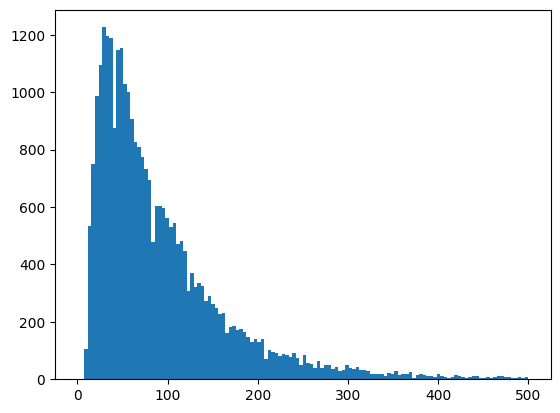

In [148]:
import matplotlib.pyplot as plt

plt.hist([len(sentence.split()) for sentence in train_df_vi['preprocess_sentence']], bins=128, range=(0, 500))
plt.show()

In [149]:
# count: words and vocabulary
from collections import Counter

words = []
[[words.append(word) for word in sentence.split()] for sentence in train_df_vi['preprocess_sentence']]
vocabulary = Counter(words)
len(vocabulary), len(words)

(17244, 2856797)

## 3. Text Representation

In [150]:
def yield_tokens(sentences, tokenizer):
    for sentence in sentences:
        yield tokenizer(sentence)

In [151]:
# word-based tokenizer
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer("basic_english")

In [152]:
tokenizer(train_df_vi['preprocess_sentence'][0])[:5]

['mua', 'có', 'mỗi', 'bingsu', 'thập']

In [153]:
# build vocabulary
from torchtext.vocab import build_vocab_from_iterator

vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(train_df_vi['preprocess_sentence'], tokenizer),
    max_tokens=vocab_size,
    specials=["<unk>"]
)
vocabulary.set_default_index(vocabulary["<unk>"])

In [154]:
len(vocabulary)

10000

In [155]:
# encode text

print(vocabulary(tokenizer(train_df_vi['preprocess_sentence'][0])))

[140, 3, 205, 890, 913, 856, 13, 15, 2, 2556, 241, 76, 186, 20, 7, 369, 2495, 3, 565, 1280, 213, 282, 96, 56, 419, 606, 2777, 659, 2, 13, 120, 3, 10, 13, 1280, 9, 175, 1, 98, 648, 331, 369, 6, 17, 287, 20, 189, 1375, 8, 689, 277, 60]


In [156]:
from torchtext.data.functional import to_map_style_dataset

def prepare_dataset(df):
    for index, row in df.iterrows():
        sentence = row['preprocess_sentence']
        encoded_sentence = vocabulary(tokenizer(sentence))
        label = row['label']
        yield encoded_sentence, label

train_dataset = prepare_dataset(train_df_vi)
train_dataset = to_map_style_dataset(train_dataset)

valid_dataset = prepare_dataset(valid_df)
valid_dataset = to_map_style_dataset(valid_dataset)

In [157]:
print(next(iter(train_dataset)))

([140, 3, 205, 890, 913, 856, 13, 15, 2, 2556, 241, 76, 186, 20, 7, 369, 2495, 3, 565, 1280, 213, 282, 96, 56, 419, 606, 2777, 659, 2, 13, 120, 3, 10, 13, 1280, 9, 175, 1, 98, 648, 331, 369, 6, 17, 287, 20, 189, 1375, 8, 689, 277, 60], 0)


In [158]:
len(train_dataset)

29736

## 4. Dataloader

In [159]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    encoded_sentences, labels, offsets = [], [], [0]
    for encoded_sentence, label in batch:
        labels.append(label)
        encoded_sentence = torch.tensor(encoded_sentence, dtype=torch.int64)
        encoded_sentences.append(encoded_sentence)
        offsets.append(encoded_sentence.size(0))

    labels = torch.tensor(labels, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    encoded_sentences = torch.cat(encoded_sentences)
    return encoded_sentences.to(device), offsets.to(device), labels.to(device)

In [160]:
from torch.utils.data import DataLoader

batch_size = 128
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_batch
)
valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch
)

In [164]:
next(iter(train_dataloader))

(tensor([116,  57, 182,  ..., 844, 128,  20]),
 tensor([    0,    16,    65,   108,   180,   324,   400,   507,   542,   673,
           791,   870,   893,   928,  1010,  1081,  1181,  1246,  1313,  1338,
          1443,  1469,  1545,  1648,  1681,  1747,  1976,  2013,  2097,  2128,
          2202,  2241,  2257,  2357,  2460,  2544,  2596,  2664,  2784,  2799,
          2889,  2924,  2961,  3065,  3126,  3235,  3339,  3651,  3791,  3813,
          3944,  4012,  4241,  4336,  4361,  4497,  4526,  4646,  4872,  4923,
          4944,  4982,  5067,  5174,  5251,  5389,  5508,  5599,  5726,  5746,
          5785,  5885,  5927,  5966,  6226,  6272,  6309,  6546,  6759,  6796,
          6858,  7290,  7372,  7427,  7519,  7533,  7628,  7653,  7726,  7760,
          7820,  7838,  7916,  7995,  8185,  8254,  8445,  8494,  8614,  8665,
          8756,  8898,  8961,  8991,  9052,  9236,  9312,  9466,  9495,  9581,
          9626,  9666,  9947, 10096, 10130, 10224, 10367, 10566, 10594, 10623,
     

In [165]:
encoded_sentences, offsets, labels = next(iter(train_dataloader))

In [166]:
encoded_sentences.shape

torch.Size([13259])

## 4. Model

### Embedding

In [167]:
from torch import nn

class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class, seq_len):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.ft = nn.Flatten()
        self.fc = nn.Linear(seq_len*embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, inputs):
        embedded = self.embedding(inputs)
        ouput = self.ft(embedded)
        return self.fc(ouput)

In [168]:
batch_size = 5
seq_len = 10
input = torch.ones([batch_size, seq_len], dtype=torch.int32)
input

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=torch.int32)

In [169]:
num_class = 2
vocab_size = 5000
embed_dim = 100
model = TextClassificationModel(vocab_size, embed_dim, num_class, seq_len)

In [170]:
model

TextClassificationModel(
  (embedding): Embedding(5000, 100)
  (ft): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=1000, out_features=2, bias=True)
)

In [171]:
predictions = model(input)
predictions

tensor([[ 1.4081, -0.4070],
        [ 1.4081, -0.4070],
        [ 1.4081, -0.4070],
        [ 1.4081, -0.4070],
        [ 1.4081, -0.4070]], grad_fn=<AddmmBackward0>)

### EmbeddingBag

In [172]:
from torch import nn

class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, inputs, offsets):
        embedded = self.embedding(inputs, offsets)
        return self.fc(embedded)

In [173]:
num_class = len(set(train_df_vi['label']))
vocab_size = len(vocabulary)
embed_dim = 100
model = TextClassificationModel(vocab_size, embed_dim, num_class).to(device)

In [174]:
model

TextClassificationModel(
  (embedding): EmbeddingBag(10000, 100, mode='mean')
  (fc): Linear(in_features=100, out_features=2, bias=True)
)

In [175]:
predictions = model(encoded_sentences, offsets)
predictions

tensor([[ 2.9113e-02, -2.4893e-02],
        [ 1.1344e-01,  2.1984e-01],
        [ 2.1832e-01,  1.0814e-02],
        [ 1.8739e-01, -5.3573e-02],
        [-2.9708e-02,  1.4616e-01],
        [ 5.8519e-02, -5.4750e-02],
        [ 1.4334e-01,  8.3761e-02],
        [ 1.7434e-01,  1.8472e-01],
        [ 1.6583e-01, -5.7495e-03],
        [-6.4203e-03, -1.4006e-01],
        [ 1.9806e-01,  5.1644e-02],
        [ 1.1344e-01, -8.5453e-02],
        [ 1.1119e-01, -1.8860e-01],
        [-7.2048e-03, -1.0170e-01],
        [ 1.3507e-02, -3.7617e-02],
        [ 8.6525e-02, -8.6310e-02],
        [ 1.2098e-01, -5.8796e-02],
        [ 5.9183e-02, -4.8672e-02],
        [ 6.1043e-02, -8.0692e-02],
        [-2.3744e-02,  2.8046e-01],
        [ 6.8874e-02, -4.2777e-03],
        [ 3.7901e-01,  2.8211e-01],
        [ 6.0494e-02, -5.8338e-02],
        [-8.1229e-02, -5.7431e-03],
        [ 2.2162e-01,  2.0491e-01],
        [ 1.2702e-01,  3.2595e-02],
        [ 2.0836e-01, -1.4376e-01],
        [ 8.8865e-02, -3.443

In [176]:
learning_rate = 2e-5

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [177]:
loss = criterion(predictions, labels)

In [178]:
loss

tensor(0.6803, grad_fn=<NllLossBackward0>)

## 5. Trainer

In [179]:
import time

def train(model, optimizer, criterion, train_dataloader, epoch=0, log_interval=50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()

    for idx, (inputs, offsets, labels) in enumerate(train_dataloader):
        optimizer.zero_grad()
        predictions = model(inputs, offsets)

        # compute loss
        loss = criterion(predictions, labels)
        losses.append(loss.item())

        # backward
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predictions.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(train_dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [180]:
epoch_acc, epoch_loss = train(model, optimizer, criterion, train_dataloader)

| epoch   0 |    50/  233 batches | accuracy    0.534
| epoch   0 |   100/  233 batches | accuracy    0.539
| epoch   0 |   150/  233 batches | accuracy    0.539
| epoch   0 |   200/  233 batches | accuracy    0.544


In [181]:
epoch_acc, epoch_loss

(0.5486526946107785, 0.6889872070034174)

In [182]:
def evaluate(model, criterion, valid_dataloader):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []

    with torch.no_grad():
        for idx, (inputs, offsets, labels) in enumerate(valid_dataloader):
            predictions = model(inputs, offsets)
            loss = criterion(predictions, labels)
            losses.append(loss)
            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [183]:
eval_acc, eval_loss = evaluate(model, criterion, valid_dataloader)

In [186]:
eval_acc, eval_loss

(0.8608, tensor(0.3499))

## 6. Training

In [184]:
num_class = len(set(train_df_vi['label']))
vocab_size = len(vocabulary)
embed_dim = 100
model = TextClassificationModel(vocab_size, embed_dim, num_class).to(device)

learning_rate = 5
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 10
for epoch in range(1, num_epochs+1):
    epoch_start_time = time.time()
    train_acc, train_loss = train(model, optimizer, criterion, train_dataloader, epoch)
    eval_acc, eval_loss = evaluate(model, criterion, valid_dataloader)
    print("-" * 59)
    print(
        "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
        "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
            epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
        )
    )
    print("-" * 59)

| epoch   1 |    50/  233 batches | accuracy    0.684
| epoch   1 |   100/  233 batches | accuracy    0.796
| epoch   1 |   150/  233 batches | accuracy    0.827
| epoch   1 |   200/  233 batches | accuracy    0.842
-----------------------------------------------------------
| End of epoch   1 | Time:  1.20s | Train Accuracy    0.834 | Train Loss    0.458 | Valid Accuracy    0.811 | Valid Loss    0.416 
-----------------------------------------------------------
| epoch   2 |    50/  233 batches | accuracy    0.852
| epoch   2 |   100/  233 batches | accuracy    0.852
| epoch   2 |   150/  233 batches | accuracy    0.859
| epoch   2 |   200/  233 batches | accuracy    0.860
-----------------------------------------------------------
| End of epoch   2 | Time:  1.09s | Train Accuracy    0.863 | Train Loss    0.361 | Valid Accuracy    0.843 | Valid Loss    0.376 
-----------------------------------------------------------
| epoch   3 |    50/  233 batches | accuracy    0.865
| epoch   3 

## 7. Prediction

In [187]:
model = model.to('cpu')

In [188]:
def predict(text):
    with torch.no_grad():
        encoded = torch.tensor(vocabulary(tokenizer(text)))
        output = model(encoded, torch.tensor([0]))
        return output.argmax(1).item()

In [189]:
test_df.iloc[0]

sentence               Quán này khá là nổi_tiếng nay mới có dịp ghé t...
label                                                                  0
preprocess_sentence    quán này khá là nổi tiếng nay mới có dịp ghé t...
Name: 0, dtype: object

In [190]:
predict(test_df.iloc[0]['sentence'])

0

In [191]:
# compute accuracy on test set

predictions, labels = [], []
for index, row in test_df.iterrows():
    sentence = row['preprocess_sentence']
    label = row['label']
    prediction = predict(sentence)
    predictions.append(prediction)
    labels.append(label)

sum(torch.tensor(predictions) == torch.tensor(labels))/len(labels)

tensor(0.8673)

## 8. Compare: BoW, TF-IDF

### 8.1. BoW

In [192]:
import numpy as np

In [193]:
train_labels = np.array(train_df_vi['label'].tolist())
test_labels = np.array(test_df['label'].tolist())

In [196]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 10000
vectorizer = CountVectorizer(max_features=max_features)

train_sequences = vectorizer.fit_transform(train_df_vi['preprocess_sentence'])
test_sequences = vectorizer.transform(test_df['preprocess_sentence'])
vocab_size = len(vectorizer.vocabulary_)
vocab_size

10000

In [197]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_sequences, train_labels)

C:\Users\Admin\anaconda3\envs\basicNLPAIO\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [198]:
logreg.score(test_sequences, test_labels)

0.8779

### 8.2. TF-IDF

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 10000
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

train_sequences = tfidf_vectorizer.fit_transform(train_df_vi['preprocess_sentence'])
test_sequences = tfidf_vectorizer.transform(test_df['preprocess_sentence'])

In [200]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_sequences, train_labels)

LogisticRegression()

In [201]:
logreg.score(test_sequences, test_labels)

0.8822